<a href="https://colab.research.google.com/github/david-j-cox/Man-vs-Machine/blob/master/6_visualizations_re24_re288_so.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the environment

In [1]:
# Set working directory
from google.colab import drive
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/GME & MLB/Scripts and Notebooks/'

Mounted at /content/gdrive
/content/gdrive/My Drive/GME & MLB/Scripts and Notebooks


In [ ]:
# Connect GPU, if desired
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [2]:
# Connect TPU, if desired
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.7.0
Running on TPU  ['10.26.101.122:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.26.101.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.26.101.122:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
# Packages and modules we'll use
# System stuff
import glob
import zipfile, io, os

# Data manipulation
import pandas as pd
import numpy as np
import math

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure dataframe is ready for fitting

In [4]:
# Read in the data
df = pd.read_csv('../Data/07_reporting/all_fits_all_sr.csv').drop(['Unnamed: 0'], axis=1)
df

,Player,Season,Reinforcer,VAC,Bias,Sensitivity
0,110683,2008,re_24_change_raw,0.4456,-0.4505,0.5315
1,110683,2008,re_24_change_ord,0.7648,-0.2153,0.9851
2,110683,2008,re_288_change_raw,0.3240,-0.5186,0.4689
3,110683,2008,re_288_change_ord,0.7962,-0.1207,0.9110
4,110683,2008,so_change,0.8556,-0.1297,0.9508
...,...,...,...,...,...,...
38525,677976,2019,re_24_change_raw,0.5543,-0.2499,0.4646
38526,677976,2019,re_24_change_ord,0.6638,-0.1495,0.7025
38527,677976,2019,re_288_change_raw,0.7031,-0.3062,0.4799
38528,677976,2019,re_288_change_ord,0.5606,-0.2608,0.5149


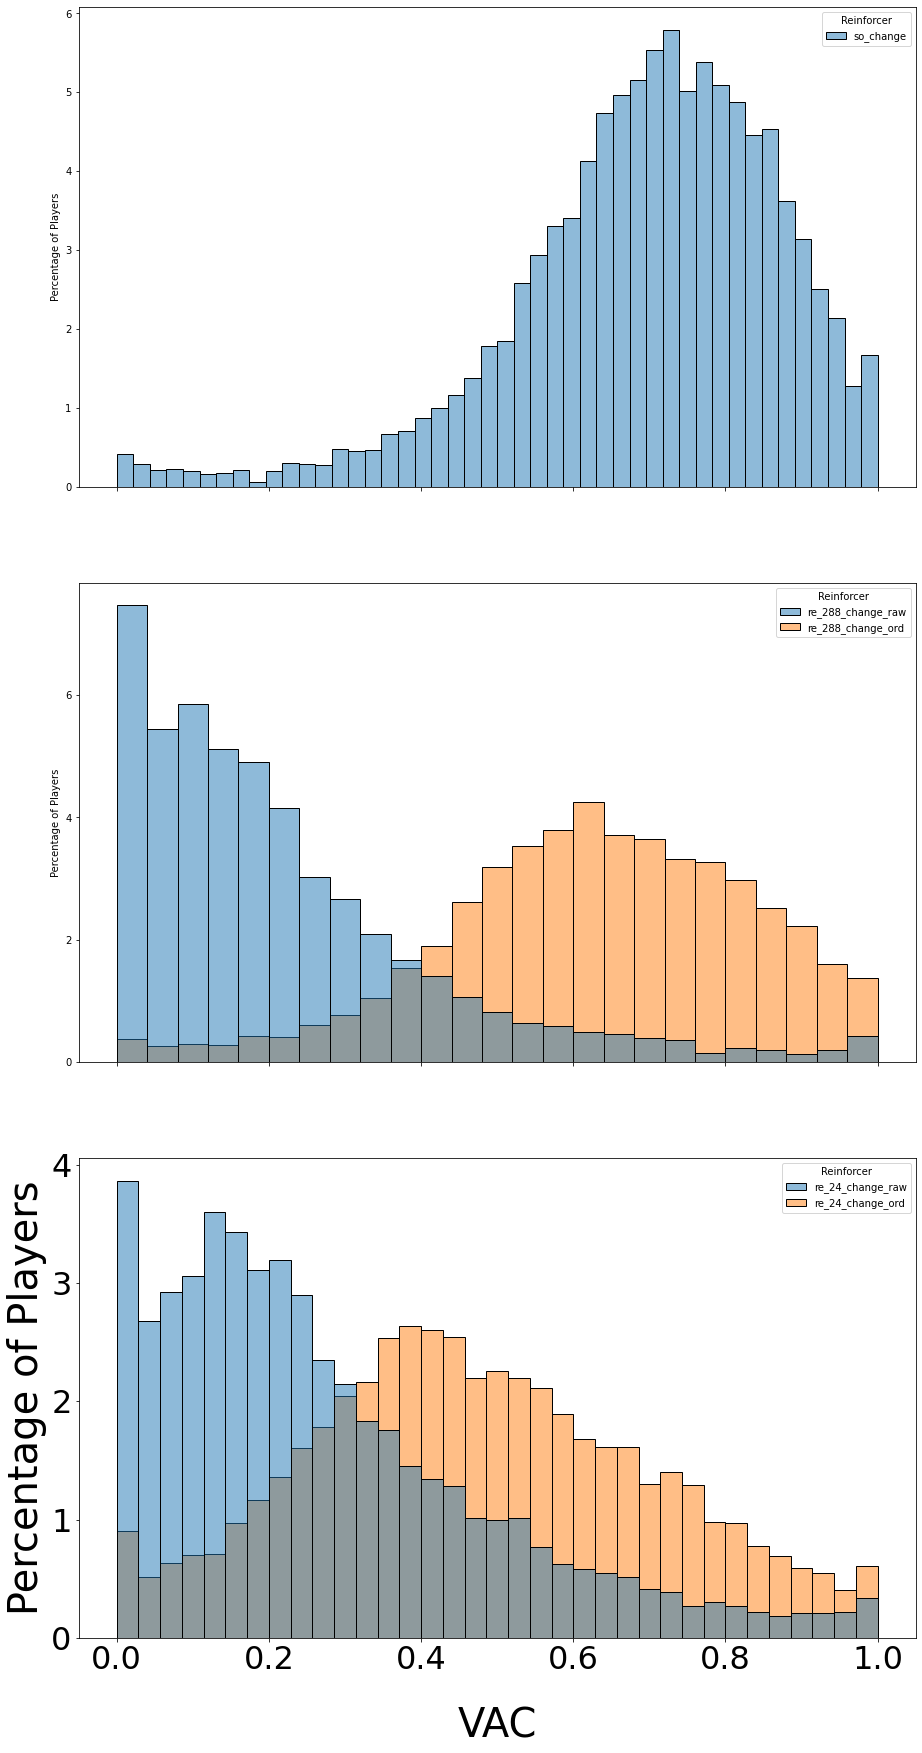

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15, 30))
sns.histplot(ax=ax[0], data=df[df['Reinforcer'].isin(['so_change'])], x='VAC', hue='Reinforcer', alpha=0.5, stat='percent')
sns.histplot(ax=ax[1], data=df[df['Reinforcer'].isin(['re_288_change_raw', 're_288_change_ord'])], x='VAC', hue='Reinforcer', alpha=0.5, stat='percent')
sns.histplot(ax=ax[2], data=df[df['Reinforcer'].isin(['re_24_change_raw', 're_24_change_ord'])], x='VAC', hue='Reinforcer', alpha=0.5, stat='percent')
matplotlib.rc('xtick', labelsize=32) 
matplotlib.rc('ytick', labelsize=32)
plt.tick_params(axis='both', which='major', labelsize=32)
plt.xlabel('VAC', fontsize=40, labelpad=30)
for ax in ax.flat:
    ax.set(ylabel='Percentage of Players')
for item in [ax.yaxis.label]:
  item.set_fontsize(40)
plt.show()

In [6]:
# Create df of all the maxes per year
max_df = pd.DataFrame()
for i in df['Player'].unique():
  temp_df = df[df['Player']==i].reset_index(drop=True)
  idx = temp_df.groupby(by=['Season'])['VAC'].transform(max)==temp_df['VAC']
  max_df = max_df.append(temp_df[idx], ignore_index=True)
max_df.to_csv('../Data/07_reporting/max_df.csv')
max_df

,Player,Season,Reinforcer,VAC,Bias,Sensitivity
0,110683,2008,so_change,0.8556,-0.1297,0.9508
1,110683,2009,so_change,0.7959,-0.1286,1.0398
2,110683,2010,so_change,0.7343,-0.2548,0.8410
3,110683,2011,re_288_change_ord,0.8879,-0.0414,1.1555
4,110683,2012,so_change,0.7173,-0.1319,0.8997
...,...,...,...,...,...,...
7782,672773,2019,so_change,0.6994,0.0115,0.5973
7783,673258,2019,so_change,0.6584,0.0210,0.6062
7784,675916,2019,re_288_change_raw,0.8052,0.0612,-0.1475
7785,676606,2019,so_change,0.6583,0.0250,0.5750


In [7]:
sr_vc = pd.DataFrame(max_df.Reinforcer.value_counts())
sr_vc = sr_vc.reset_index()
sr_vc.columns = ['reinforcer', 'count']
sr_vc['percent_max'] = round(sr_vc['count']/7706, 2)*100
sr_vc

,reinforcer,count,percent_max
0,so_change,4905,64.0
1,re_288_change_ord,2187,28.0
2,re_24_change_ord,480,6.0
3,re_24_change_raw,115,1.0
4,re_288_change_raw,100,1.0


In [8]:
# Change reinforcer categories to make them more readable
sr_vc = sr_vc.replace('so_change', 'Strikes\nOuts')
sr_vc = sr_vc.replace('re_288_change_ord', 'RE288\nOrdinal')
sr_vc = sr_vc.replace('re_24_change_ord', 'RE24\nOrdinal')
sr_vc = sr_vc.replace('re_24_change_raw', 'RE24\nContinuous')
sr_vc = sr_vc.replace('re_288_change_raw', 'RE288\nContinuous')

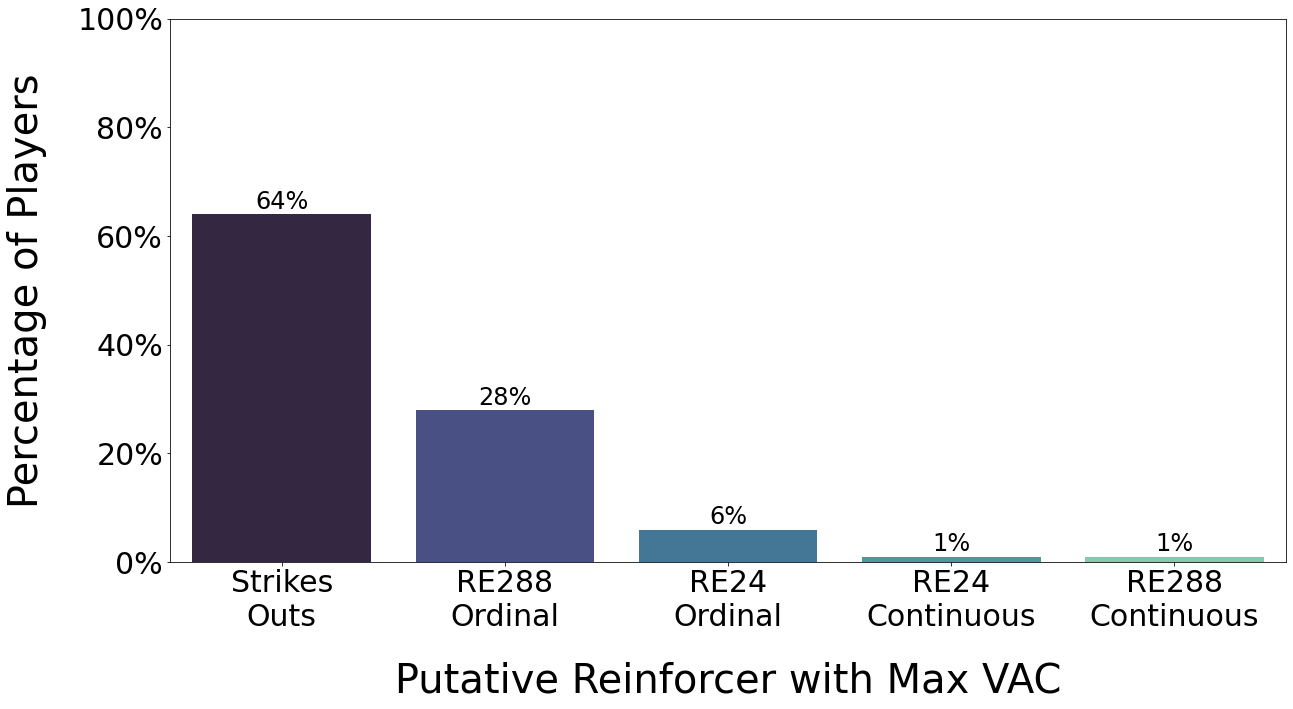

In [9]:
yticks = list(range(0, 101, 20))
ylabs = [(str(val)+'%') for val in yticks]
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.barplot(data=sr_vc, x='reinforcer', y='percent_max', palette='mako')
plt.yticks(ticks=yticks, labels=ylabs, fontsize=30)
plt.ylabel('Percentage of Players', fontsize=40, labelpad=30)
plt.xticks(fontsize=30, rotation=0)
plt.xlabel('Putative Reinforcer with Max VAC', fontsize=40, labelpad=30)
for index, row in sr_vc.iterrows():
    g.text(row.name,row.percent_max+1, str(int(row.percent_max))+'%', color='black', ha="center", fontsize=24)
plt.show()

In [10]:
# Get difference in each param from max for each pitcher
player = []
season = []
vac_diff = []
bias_diff = []
sens_diff = []

for i in df['Player'].unique():
  temp_df = df[df['Player']==i].reset_index(drop=True)
  for year in temp_df['Season'].unique():
    t_df = temp_df[temp_df['Season']==year].reset_index(drop=True)
    t_df['vac_diff'] = t_df['VAC'] - t_df['VAC'].max()
    t_df['bias_diff'] = t_df['Bias'] - t_df['Bias'].max()
    t_df['sens_diff'] = t_df['Sensitivity'] - t_df['Sensitivity'].max()
    for j in range(len(t_df)):
      player.append(i)
      season.append(year)
      vac_diff.append(t_df['vac_diff'][j])
      bias_diff.append(t_df['bias_diff'][j])
      sens_diff.append(t_df['sens_diff'][j])

diff_from_max_df = pd.DataFrame({'player': player, 
                                 'vac_diff': vac_diff, 
                                 'bias_diff': bias_diff, 
                                 'sens_diff': sens_diff})
diff_from_max_df.to_csv('../Data/07_reporting/diff_from_max.csv')
diff_from_max_df

,player,vac_diff,bias_diff,sens_diff
0,110683,-0.4100,-0.3298,-0.4536
1,110683,-0.0908,-0.0946,0.0000
2,110683,-0.5316,-0.3979,-0.5162
3,110683,-0.0594,0.0000,-0.0741
4,110683,0.0000,-0.0090,-0.0343
...,...,...,...,...
38525,677976,-0.1561,-0.1004,-0.2379
38526,677976,-0.0466,0.0000,0.0000
38527,677976,-0.0073,-0.1567,-0.2226
38528,677976,-0.1498,-0.1113,-0.1876


In [11]:
# Plot distributions of differences 
def histplot(df, col, xlabel, yticks, xmin=None, xmax=None, bins=50):
  ylabs = [(str(val)+'%') for val in yticks]
  fig, ax = plt.subplots(figsize=(15, 10))
  sns.histplot(data=df, x=col, stat='percent', color='navy', bins=bins)
  plt.tick_params(axis='both', which='major', labelsize=32)
  plt.yticks(ticks=yticks, labels=ylabs)
  plt.xlim(xmin, xmax)
  plt.xlabel(xlabel, fontsize=40, labelpad=30)
  plt.ylabel('Percentage of Players', fontsize=40, labelpad=30)
  plt.show()

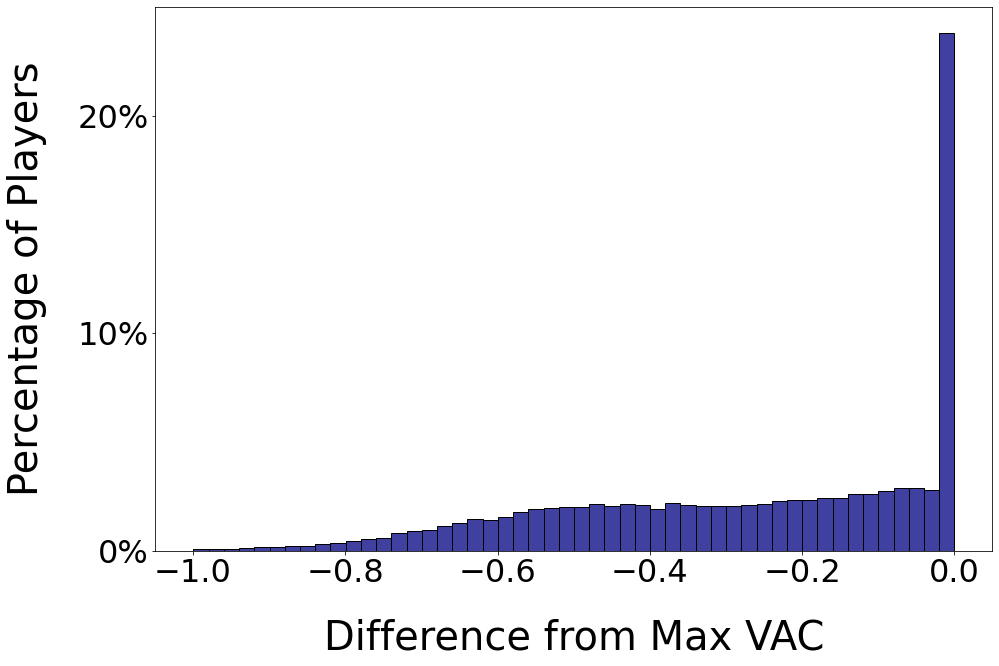

In [12]:
histplot(df=diff_from_max_df[diff_from_max_df['bias_diff']!=0], 
         col='vac_diff', 
         xlabel='Difference from Max VAC', 
         yticks=list(range(0, 30, 10)))

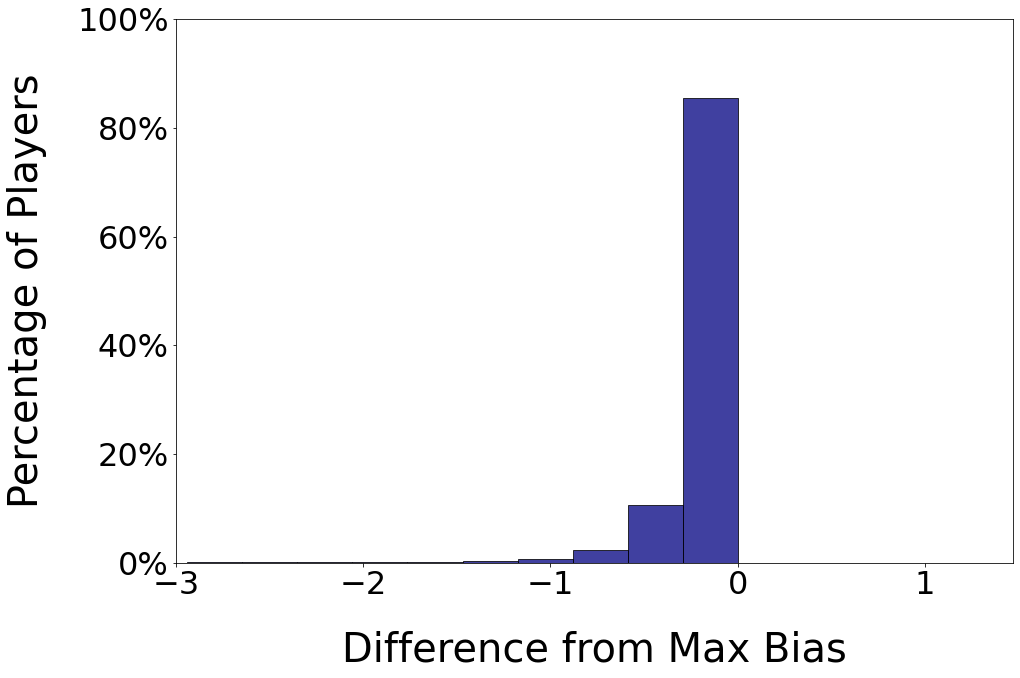

In [13]:
histplot(df=diff_from_max_df[diff_from_max_df['bias_diff']!=0], 
         col='bias_diff', 
         xlabel='Difference from Max Bias', 
         yticks=list(range(0, 101, 20)), 
         xmin=-3, bins=100)

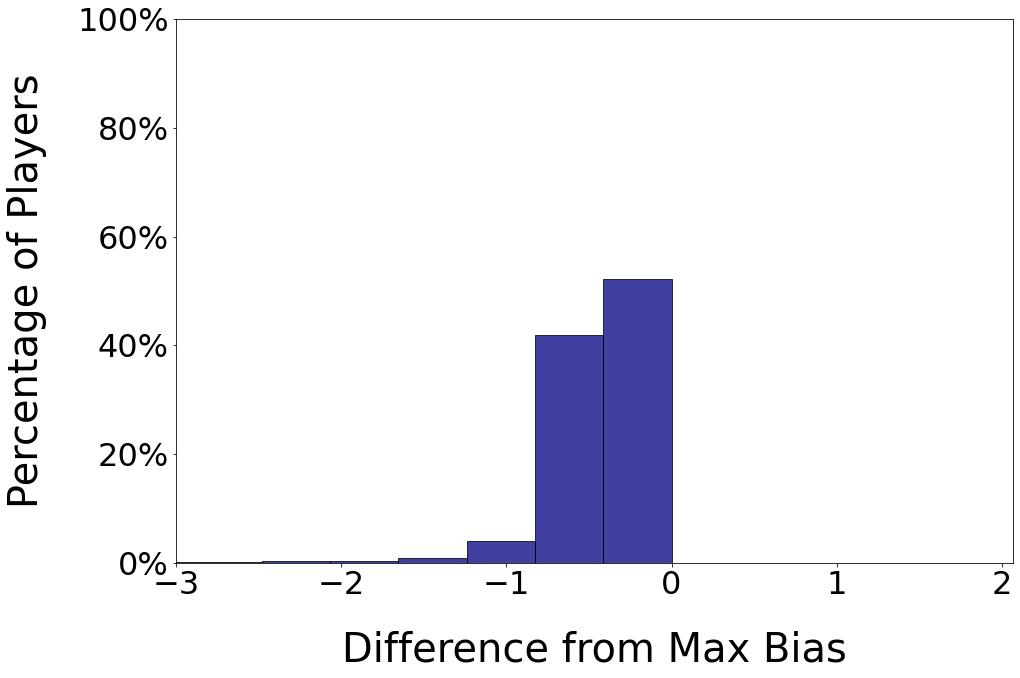

In [14]:
histplot(df=diff_from_max_df[diff_from_max_df['sens_diff']!=0], 
         col='sens_diff', 
         xlabel='Difference from Max Bias', 
         yticks=list(range(0, 101, 20)), 
         xmin=-3, bins=100
         )

In [15]:
def box_swarm(df, col, yticks, ymin=None, ymax=None,):
  ylabs = [(str(val)+'%') for val in yticks]
  fig, ax = plt.subplots(figsize=(5, 7))
  sns.swarmplot(y=df[col], color='navy', alpha=0.2)
  sns.boxplot(y=df[col], color='w')
  plt.tick_params(axis='both', which='major', labelsize=14)
  plt.yticks(ticks=yticks, labels=ylabs)
  plt.ylim(ymin, ymax)
  plt.ylabel('Percentage of Players', fontsize=40, labelpad=30)
  plt.show()

In [27]:
plot_df = diff_from_max_df[diff_from_max_df['vac_diff']!=0]
plot_df

,player,vac_diff,bias_diff,sens_diff
0,110683,-0.4100,-0.3298,-0.4536
1,110683,-0.0908,-0.0946,0.0000
2,110683,-0.5316,-0.3979,-0.5162
3,110683,-0.0594,0.0000,-0.0741
5,110683,-0.4277,-0.4738,-0.6537
...,...,...,...,...
38523,676606,-0.2074,-0.0116,0.0000
38525,677976,-0.1561,-0.1004,-0.2379
38526,677976,-0.0466,0.0000,0.0000
38527,677976,-0.0073,-0.1567,-0.2226


In [152]:
def the_goodie(df, col, ylabel, ymin=None, ymax=None):
  fig, ax = plt.subplots(figsize=(12, 15))
  sns.boxplot(y=df[col], color='w', showmeans=True,
              meanprops={"marker":"*",
                         "markerfacecolor":"white",
                         "markeredgecolor":"black",
                         "markersize":"40"})
  sns.violinplot(y=df[col], color='w')
  sns.stripplot(y=df[col], color='k', alpha=0.1)
  plt.ylabel(ylabel, fontsize=40, labelpad=20)
  plt.yticks(fontsize=30)
  plt.ylim(ymin, ymax)
  plt.show()

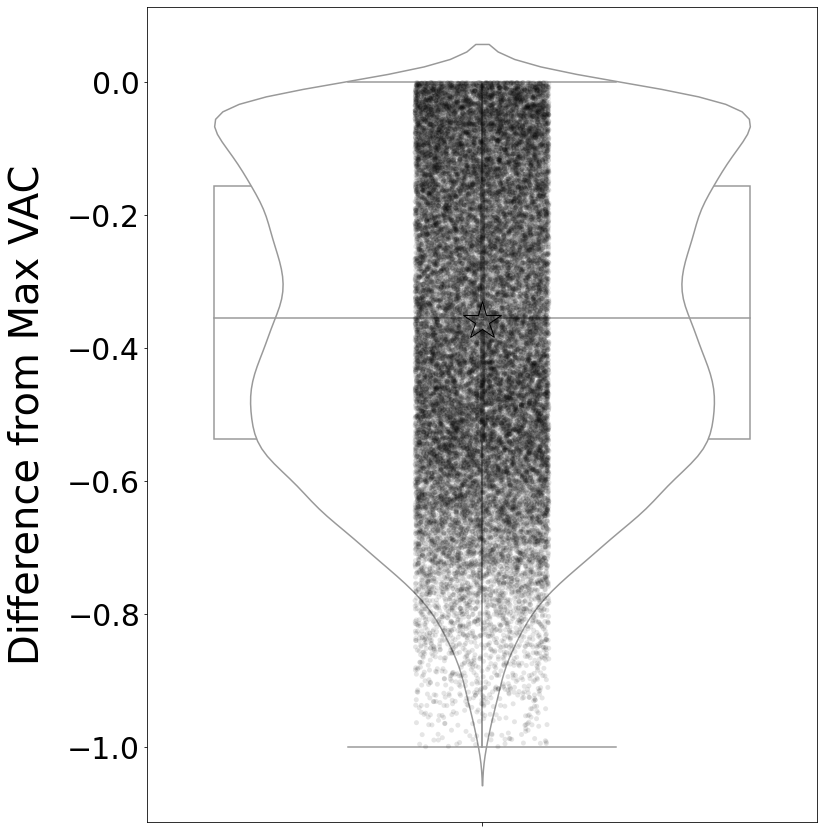

In [153]:
the_goodie(df=plot_df, col='vac_diff', ylabel='Difference from Max VAC')

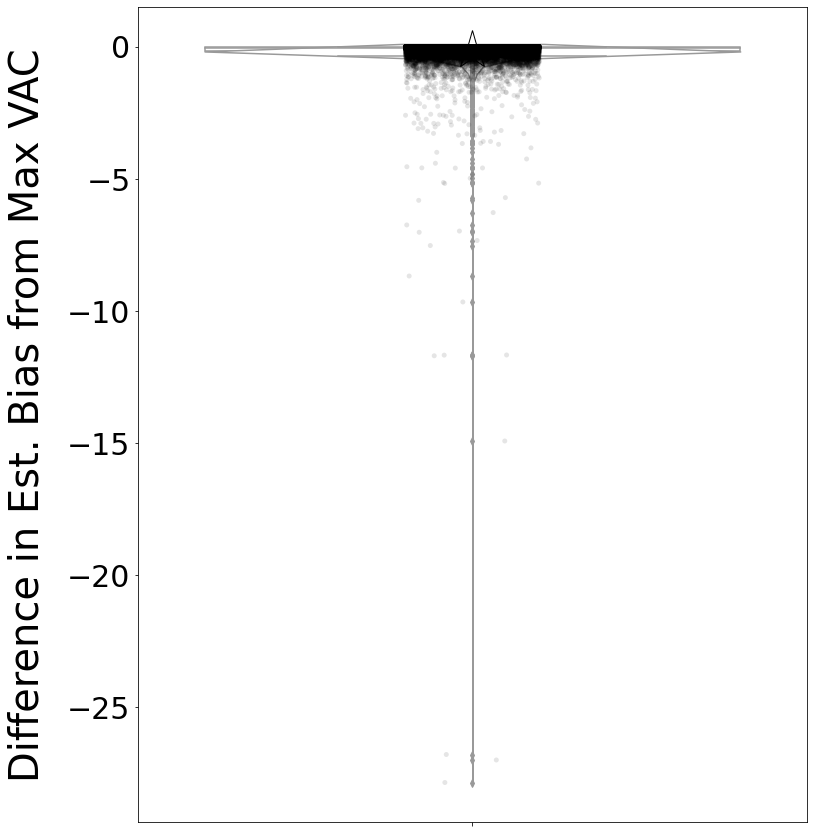

In [154]:
the_goodie(df=plot_df, col='bias_diff', ylabel='Difference in Est. Bias from Max VAC')

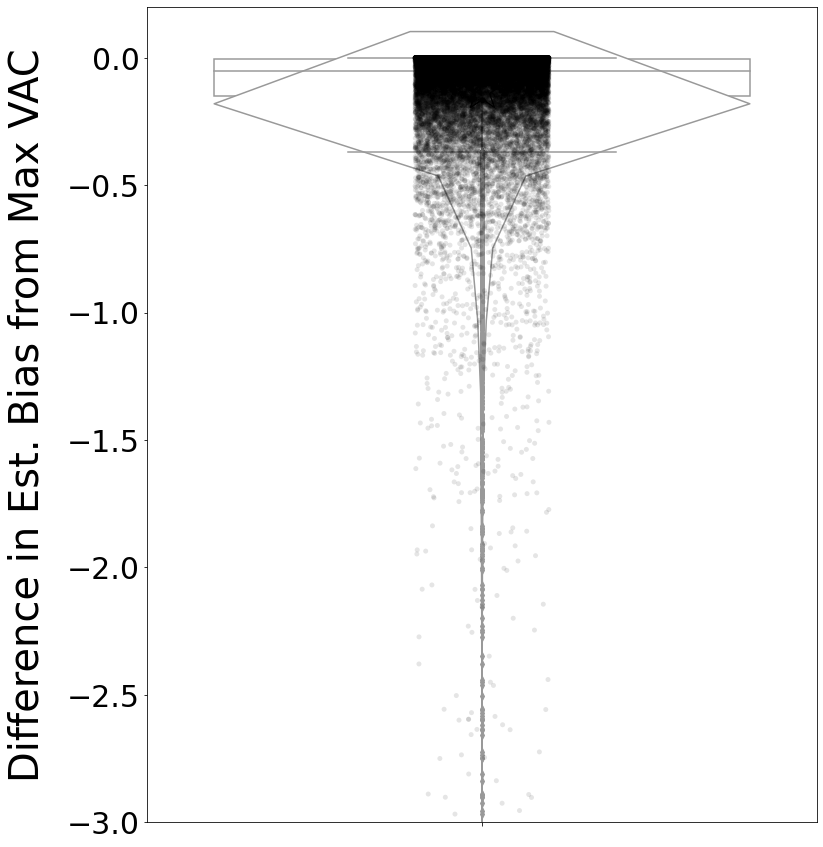

In [155]:
the_goodie(df=plot_df, col='bias_diff', ylabel='Difference in Est. Bias from Max VAC', ymin=-3, ymax=0.2)

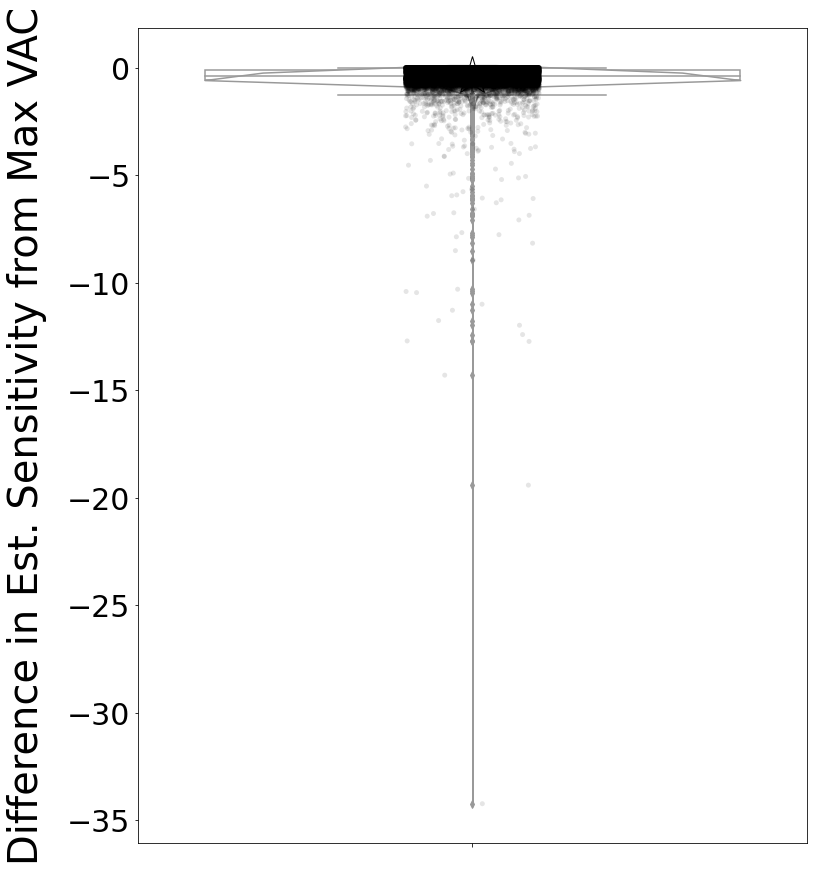

In [156]:
the_goodie(df=plot_df, col='sens_diff', ylabel='Difference in Est. Sensitivity from Max VAC')

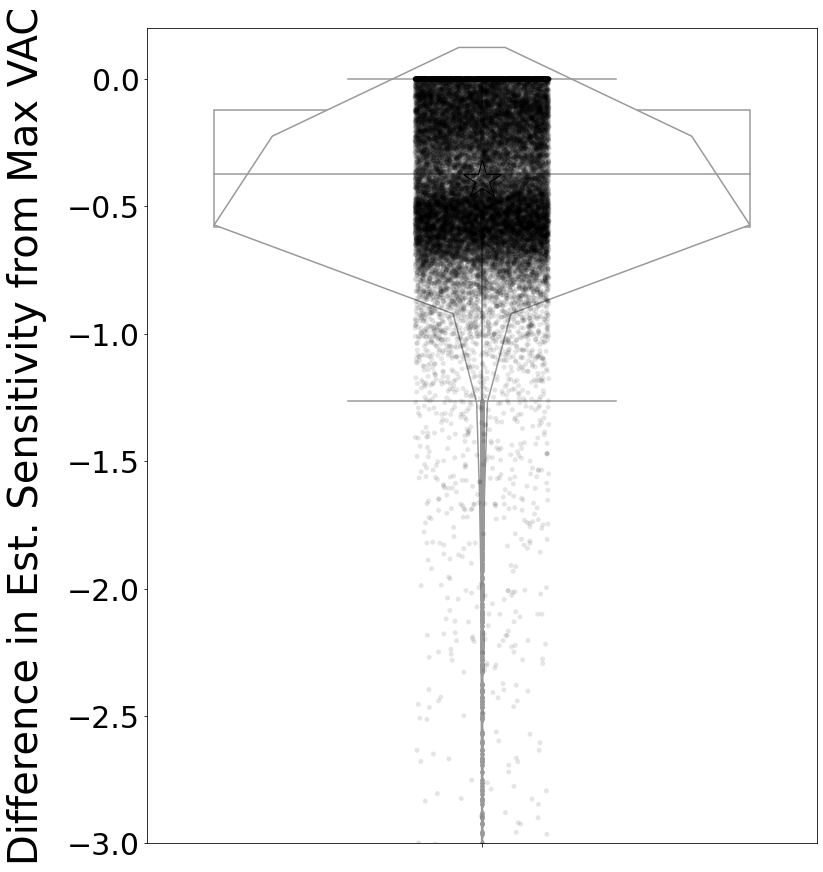

In [157]:
the_goodie(df=plot_df, col='sens_diff', ylabel='Difference in Est. Sensitivity from Max VAC', ymin=-3, ymax=0.2)

In [88]:
max_df

,Player,Season,Reinforcer,VAC,Bias,Sensitivity
0,110683,2008,so_change,0.8556,-0.1297,0.9508
1,110683,2009,so_change,0.7959,-0.1286,1.0398
2,110683,2010,so_change,0.7343,-0.2548,0.8410
3,110683,2011,re_288_change_ord,0.8879,-0.0414,1.1555
4,110683,2012,so_change,0.7173,-0.1319,0.8997
...,...,...,...,...,...,...
7782,672773,2019,so_change,0.6994,0.0115,0.5973
7783,673258,2019,so_change,0.6584,0.0210,0.6062
7784,675916,2019,re_288_change_raw,0.8052,0.0612,-0.1475
7785,676606,2019,so_change,0.6583,0.0250,0.5750


In [98]:
count = []
reinf = []
prop = []
num_sea = []

for p in max_df['Player'].unique():
  temp_df = max_df[max_df['Player']==p]
  # Get total number of seasons we have data on them for
  num_sea.append(len(temp_df))
  # Get the number of different reinforcers that led to the max VAC for that season  
  vc = temp_df['Reinforcer'].unique()
  count.append(len(vc))
  # Get the proportion of seasons the most frequently occurring max sr+ was observed
  vc = pd.DataFrame(temp_df['Reinforcer'].value_counts())
  vc = vc.reset_index()
  vc.columns = ['reinforcer', 'count_max']
  reinf.append(vc['reinforcer'][0])
  prop.append(round(vc['count_max'][0]/vc['count_max'].sum(), 4))

count_df = pd.DataFrame({'seasons_pitched':num_sea, 
                         'num_diff_reinf_that_were_max':count, 
                         'prop_seasons_most_freq_max_was_observed':prop, 
                         'reinf_observed_most_freq':reinf})
count_df = count_df.replace('so_change', 'SO')
count_df = count_df.replace('re_288_change_raw', '288-C')
count_df = count_df.replace('re_288_change_ord', '288-O')
count_df = count_df.replace('re_24_change_raw', '24-C')
count_df = count_df.replace('re_24_change_ord', '24-O')
count_df

,seasons_pitched,num_diff_reinf_that_were_max,prop_seasons_most_freq_max_was_observed,reinf_observed_most_freq
0,5,2,0.8,so_change
1,1,1,1.0,so_change
2,1,1,1.0,so_change
3,2,2,0.5,re_288_change_ord
4,2,1,1.0,re_288_change_ord
...,...,...,...,...
2125,1,1,1.0,so_change
2126,1,1,1.0,so_change
2127,1,1,1.0,re_288_change_raw
2128,1,1,1.0,so_change


In [136]:
# Reconfigure to plot targeted col
def bar_col(df, col, xlabel, palette=None, rot=0):
  plot_df = pd.DataFrame(df[col].value_counts()).reset_index()
  fig, ax = plt.subplots(figsize=(15, 12))
  sns.barplot(x=plot_df['index'], y=plot_df[col]/plot_df[col].sum(), palette=palette)
  plt.xticks(rotation=rot)
  plt.ylabel("Proportion of Pitchers", fontsize=40, labelpad=20)
  plt.xlabel(xlabel, fontsize=40, labelpad=20)
  plt.show()

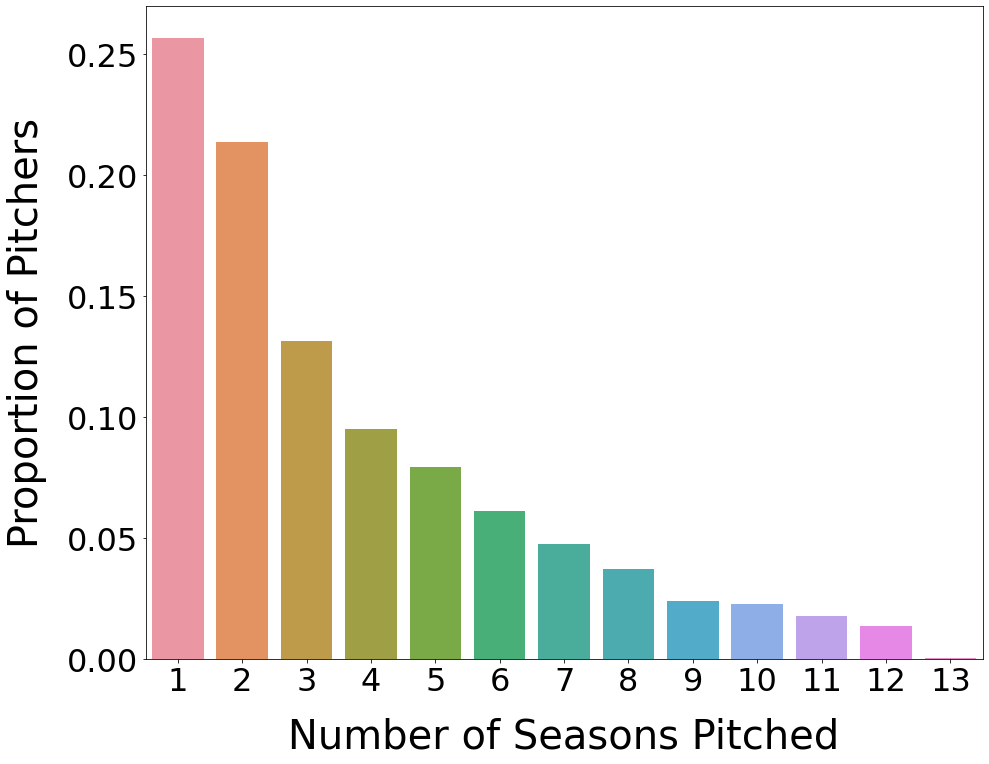

In [137]:
# Number of Seasons Pitched
bar_col(df=count_df, col='seasons_pitched', xlabel='Number of Seasons Pitched')

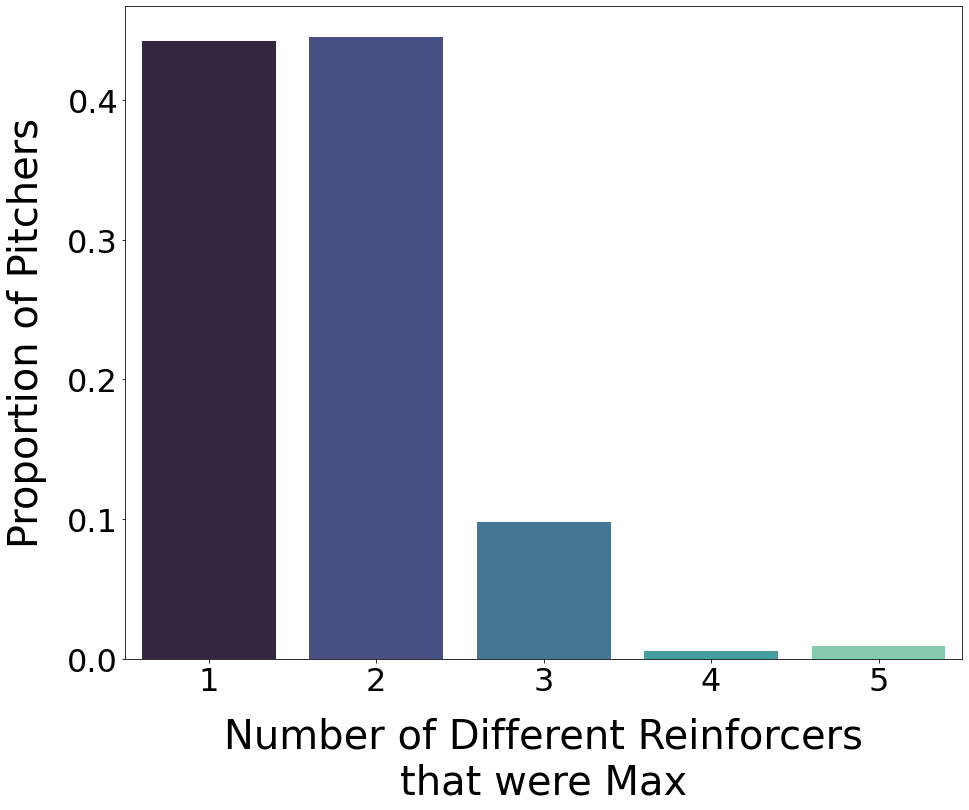

In [138]:
bar_col(df=count_df, col='num_diff_reinf_that_were_max', xlabel='Number of Different Reinforcers\nthat were Max', palette='mako')

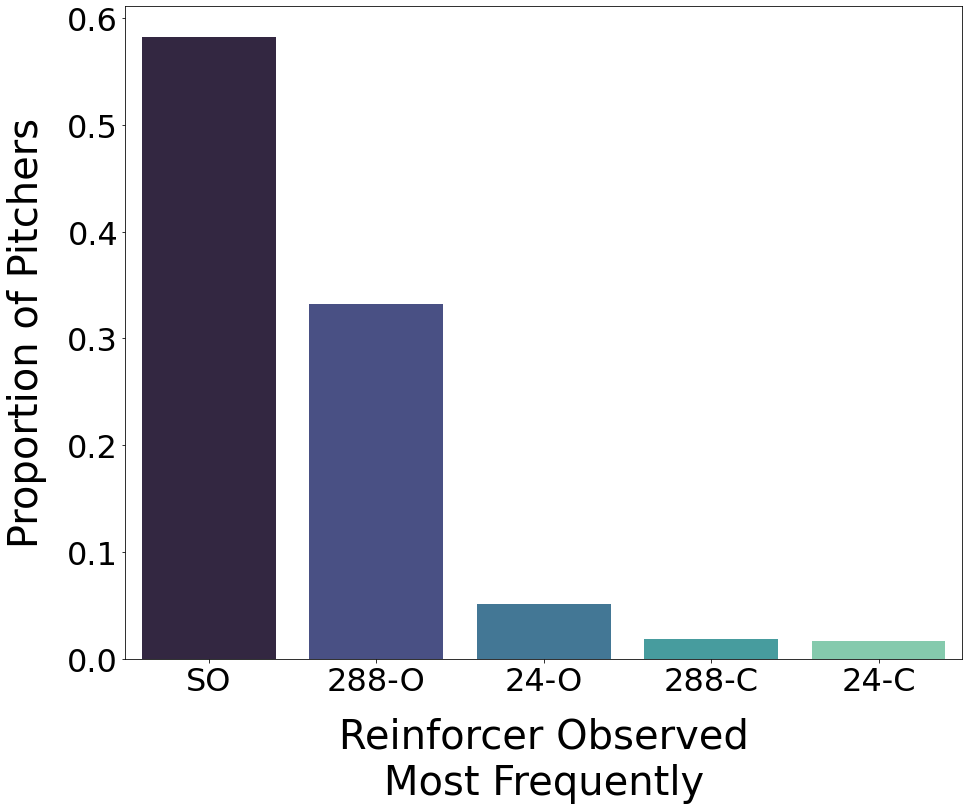

In [139]:
bar_col(df=count_df, col='reinf_observed_most_freq', xlabel='Reinforcer Observed\nMost Frequently', 
        palette='mako')

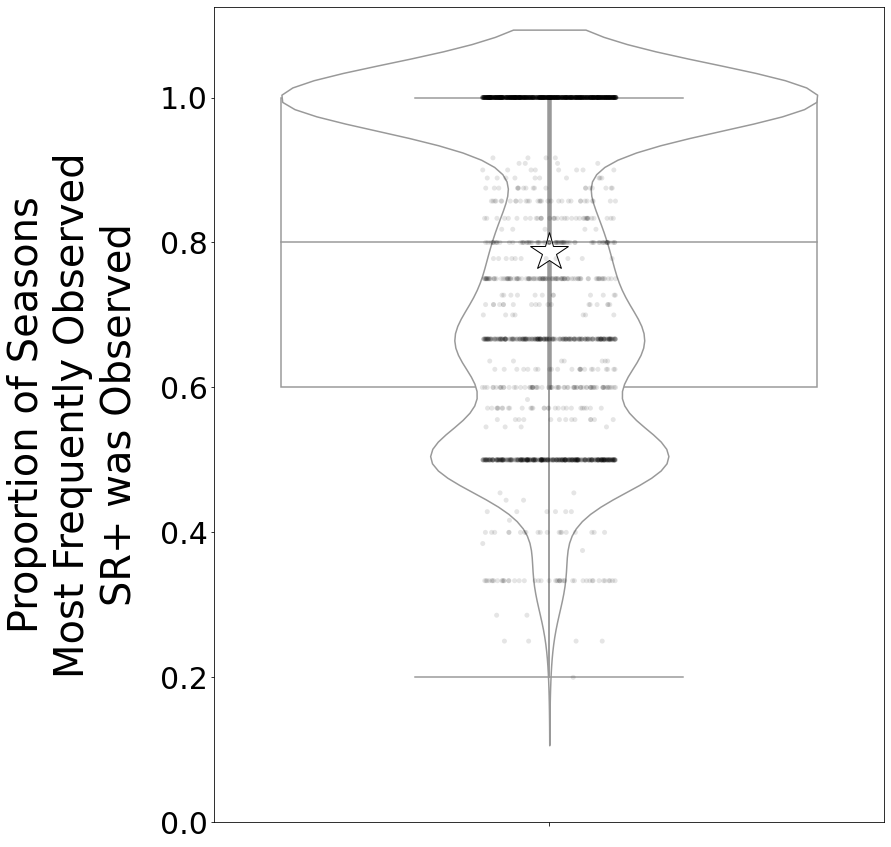

In [158]:
the_goodie(df=count_df, col='prop_seasons_most_freq_max_was_observed', 
           ylabel='Proportion of Seasons\nMost Frequently Observed\nSR+ was Observed', 
           ymin=0, ymax=1.125)

In [112]:
count_df

,seasons_pitched,num_diff_reinf_that_were_max,prop_seasons_most_freq_max_was_observed,reinf_observed_most_freq
0,5,2,0.8,so_change
1,1,1,1.0,so_change
2,1,1,1.0,so_change
3,2,2,0.5,re_288_change_ord
4,2,1,1.0,re_288_change_ord
...,...,...,...,...
2125,1,1,1.0,so_change
2126,1,1,1.0,so_change
2127,1,1,1.0,re_288_change_raw
2128,1,1,1.0,so_change
